In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

politician_names = [
    "Hitler", "Mussolini", "Churchill", "Eisenhower", "Stalin", "Attlee",
    "Franco", "De_Gaulle", "Mao_Tse", "Truman", "Chamberlain", "Tito"
]

# Dissimilarity scores for the lower triangle of the matrix
lower_triangle_data = [
    5, 11, 15, 8, 17, 5, 10, 16, 17, 12, 16,
    14, 16, 13, 18, 3, 11, 18, 18, 14, 17,
    7, 11, 11, 12, 5, 16, 8, 10, 8,
    16, 16, 14, 8, 17, 6, 7, 12,
    15, 13, 11, 12, 14, 16, 12,
    16, 12, 16, 12, 9, 13,
    9, 17, 16, 10, 12,
    13, 9, 11, 7,
    12, 17, 10,
    9, 11,
    15
]


In [2]:

dissimilarity_matrix = pd.DataFrame(0, index=politician_names, columns=politician_names)

#indices 
lower_indices = np.tril_indices(12, k=-1)

# Populate the lower triangle
dissimilarity_matrix.iloc[lower_indices] = lower_triangle_data
dissimilarity_matrix = dissimilarity_matrix + dissimilarity_matrix.T

mds = MDS(metric=False, n_components=2, dissimilarity='precomputed', random_state=42, n_init=10, normalized_stress=False)


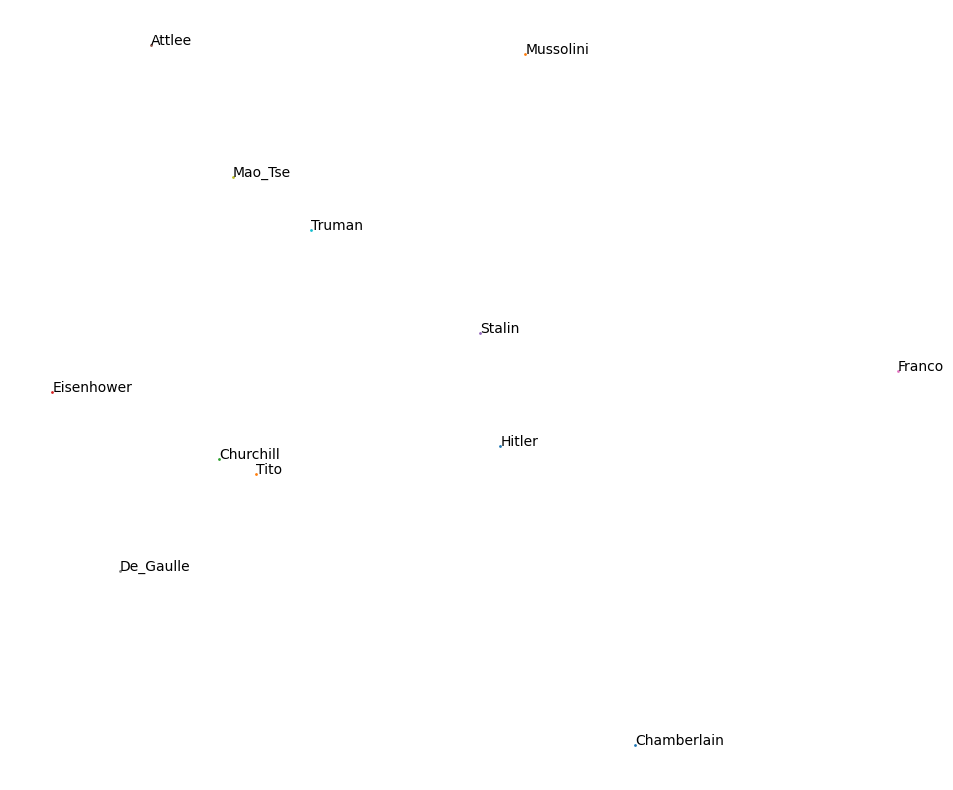

In [3]:
mds_coords = mds.fit_transform(dissimilarity_matrix)

fig, ax = plt.subplots(figsize=(12, 10))


for i, name in enumerate(politician_names):
    ax.scatter(mds_coords[i, 0], mds_coords[i, 1], s=1) 
    ax.annotate(name, (mds_coords[i, 0], mds_coords[i, 1]))
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()